In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind

data = pd.read_csv('../data/raw/Walmart_Store_sales.csv')


data.head()

data.isnull().sum()

data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Check relationship between Weekly_Sales and Holiday_Flag

In [28]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select the feature and the target variable
X = data[['Holiday_Flag']]
y = data['Weekly_Sales']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.366
Date:                Wed, 19 Jun 2024   Prob (F-statistic):            0.00222
Time:                        14:46:35   Log-Likelihood:                -66030.
No. Observations:                4504   AIC:                         1.321e+05
Df Residuals:                    4502   BIC:                         1.321e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.034e+06   8696.911    118.931   

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 320252684141.69
R^2 Score: -0.00


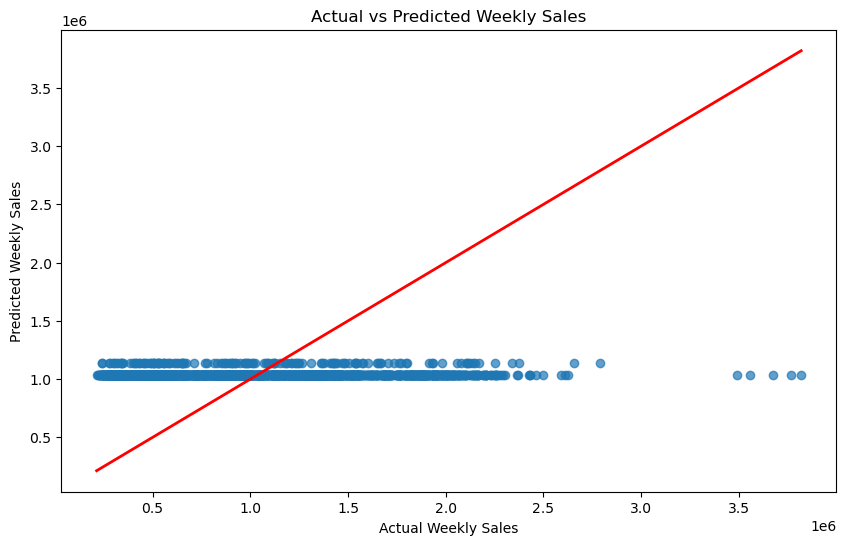

In [32]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()


Results: Overall, the results indicate that Holiday_Flag does not have a significant impact on Weekly_Sales based on this linear regression model.

Check relationship between Weekly_Sales and Temperature

Check relationship between Weekly_Sales and Fuel_Price

Check relationship between Weekly_Sales and CPI 

In [17]:
# Standardize the variables
df = data[['Weekly_Sales','CPI','Unemployment']]
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
df_scaled

,Weekly_Sales,CPI,Unemployment
0,1.057420,1.004175,0.056964
1,1.054348,1.007880,0.056964
2,1.001206,1.009074,0.056964
3,0.642828,1.009849,0.056964
4,0.899914,1.010624,0.056964
...,...,...,...
6430,-0.591489,0.519270,0.365109
6431,-0.555551,0.523256,0.356046
6432,-0.553762,0.527241,0.356046
6433,-0.582715,0.527332,0.356046


In [28]:
# Define the X and Y 
Y = df_scaled['Weekly_Sales']

# Create the model matrix
X = sm.add_constant(df_scaled['CPI'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

# Build the model
model4 = sm.OLS(y_train, X_train)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     19.18
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.22e-05
Time:                        00:11:11   Log-Likelihood:                -6370.7
No. Observations:                4504   AIC:                         1.275e+04
Df Residuals:                    4502   BIC:                         1.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.015     -0.013      0.990      -0.029       0.029
CPI           -0.0649      0.015     -4.379      0.000      -0.094      -0.036
==============================================================================
Omnibus:                      284.606   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.843
Skew:                           0.673   Prob(JB):                     9.70e-75
Kurtosis:                       3.056   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Make predictions on the test set
y_pred = result4.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1.00
R^2 Score: 0.01


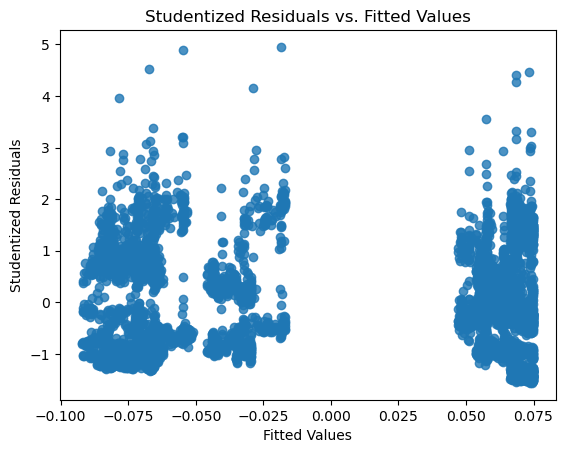

In [30]:
# Get the predicted values and studentized residuals
predicted_values = result4.predict()
studentized_residuals = result4.get_influence().resid_studentized_internal

# Plot the Studentized Residuals vs. Fitted Values
plt.scatter(predicted_values, studentized_residuals, alpha=0.8)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Fitted Values')
plt.show()

Check relationship between Weekly_Sales and Unemployment 

In [20]:
# Define the X and Y 
Y = df_scaled['Weekly_Sales']

# Create the model matrix
X = sm.add_constant(df_scaled['Unemployment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

# Build the model
model5 = sm.OLS(y_train, X_train)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     59.91
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.22e-14
Time:                        00:02:46   Log-Likelihood:                -6350.5
No. Observations:                4504   AIC:                         1.271e+04
Df Residuals:                    4502   BIC:                         1.272e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0014      0.015     -0.095      0.924      -0.030       0.028
Unemployment    -0.1135      0.015     -7.740      0.000      -0.142      -0.085
==============================================================================
Omnibus:                      248.086   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.520
Skew:                           0.622   Prob(JB):                     8.21e-64
Kurtosis:                       3.006   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Make predictions on the test set
y_pred = result5.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1.00
R^2 Score: 0.01


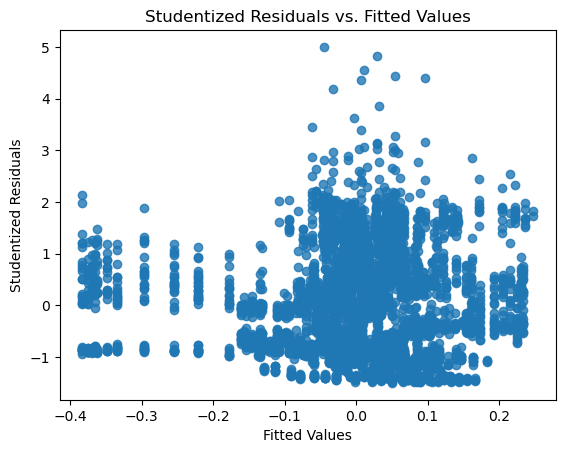

In [27]:
# Get the predicted values and studentized residuals
predicted_values = result5.predict()
studentized_residuals = result5.get_influence().resid_studentized_internal

# Plot the Studentized Residuals vs. Fitted Values
plt.scatter(predicted_values, studentized_residuals, alpha=0.8)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Fitted Values')
plt.show()